In [81]:
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

In [12]:
url = '/content/mr-bean-647.jpg'
img = cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

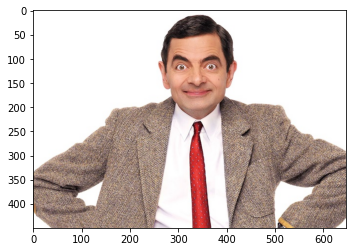

In [24]:
plt.imshow(img)
ax = plt.gca()

In [16]:
detector = MTCNN()

In [18]:
result = detector.detect_faces(img)

1/1 [==============================] - 0s 32ms/step


In [23]:
result[0]['box']

[276, 52, 122, 159]

In [42]:
x, y, width, height = result[0]['box']
rect = plt.Rectangle((x, y), width, height, fill=False, color='green', lw='5')

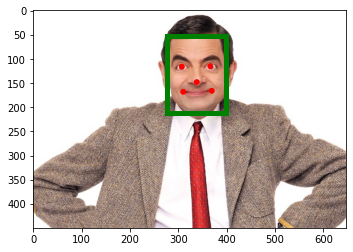

In [43]:
plt.imshow(img)
ax = plt.gca()
ax.add_patch(rect)
for key, value in result[0]['keypoints'].items():
  dot = plt.Circle(value, radius=5, color='red')
  ax.add_patch(dot)
plt.show()

## Mais de uma pessoa

3/3 [==============================] - 0s 30ms/step


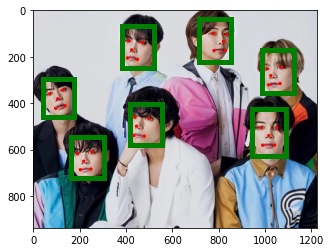

In [47]:
url = '/content/bts_copa_do_mundo-21435572.png'
img = cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

plt.imshow(img)
ax = plt.gca()

detector = MTCNN()

results = detector.detect_faces(img)

for result in results:
  x, y, width, height = result['box']
  rect = plt.Rectangle((x, y), width, height, fill=False, color='green', lw='5') 
  ax.add_patch(rect)
  for key, value in result['keypoints'].items():
    dot = plt.Circle(value, radius=5, color='red')
    ax.add_patch(dot)
plt.show()

### Recorte

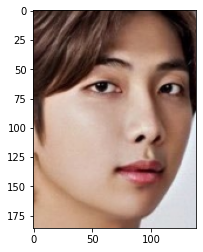

In [57]:
x,y,width,height = results[0]['box']
x1,y1 = abs(x),abs(y)
x2,y2 = x1+width, y1+height

face = img[y1:y2, x1:x2]
plt.imshow(face)

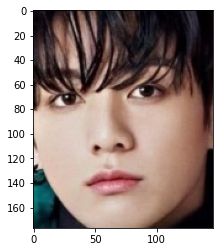

In [58]:
x,y,width,height = results[1]['box']
x1,y1 = abs(x),abs(y)
x2,y2 = x1+width, y1+height

face = img[y1:y2, x1:x2]
plt.imshow(face)

### Gerar uma lista com todas as faces encontradas

In [116]:
faces = []
for result in results:
  x,y,width,height = result['box']
  x1,y1 = abs(x),abs(y)
  x2,y2 = x1+width, y1+height

  faces.append(img[y1:y2, x1:x2])

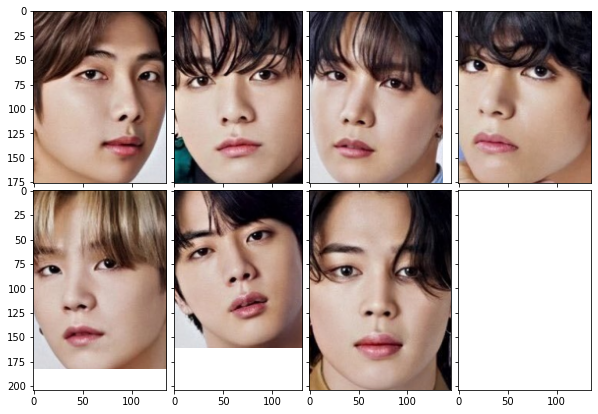

In [117]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 4),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, faces):
    ax.imshow(im)

plt.show()

Redimensionamento

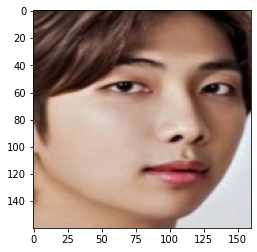

In [56]:
face_160_160 = cv2.resize(face,(160,160))
plt.imshow(face_160_160)

# Usando o FaceNet para obter embeddings

In [ ]:
pip install keras-facenet

In [63]:
from keras_facenet import FaceNet

In [64]:
embedder = FaceNet()

In [70]:
# Já identifica os rostos na foto e gera os embeddings em um único comando
out = embedder.extract(img, threshold=0.95)

1/1 [==============================] - 0s 395ms/step


In [118]:
df = pd.DataFrame(columns=np.arange(0,512))
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511


In [119]:
for idx in range(len(out)):
  df.loc[idx] = out[idx]['embedding']

df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.034707,-0.041923,-0.007665,-0.016471,0.045212,0.020694,-0.030209,-0.037808,-0.073175,0.037544,...,-0.039809,-0.056965,-0.027152,0.049677,0.007808,0.024462,-0.034034,-0.109336,-0.003780,-0.010048
1,0.060091,-0.027059,-0.047399,-0.014096,-0.006711,0.007476,-0.017696,0.022498,-0.040911,0.078629,...,0.015791,-0.068641,0.000254,0.055483,0.022493,0.036322,-0.026675,-0.058915,-0.026053,0.035400
2,0.092489,-0.029760,-0.017526,0.012574,0.064478,-0.031624,0.034188,0.014229,-0.002281,0.033150,...,-0.039929,-0.083712,-0.012185,0.088150,0.065231,0.032795,-0.006066,-0.092593,-0.019051,0.026350
3,0.084275,-0.078479,-0.065901,0.010691,-0.028065,0.024086,-0.012683,0.004029,-0.059318,0.021086,...,-0.044809,-0.039730,-0.005493,0.040544,0.034684,0.073570,-0.030065,-0.039905,-0.042804,0.013010
4,-0.002459,-0.002909,-0.009350,0.050365,0.048647,-0.065041,-0.051958,-0.030443,0.002810,0.053813,...,0.011482,-0.101799,0.018555,0.101993,0.000609,0.034711,0.035493,-0.076248,0.057157,-0.022869
5,0.059105,-0.015682,-0.004437,-0.016246,-0.001590,0.045703,-0.008318,-0.006189,-0.076775,0.083836,...,0.004247,-0.042740,-0.062619,0.005011,0.019526,0.065897,-0.002144,-0.057619,-0.010203,0.032589
6,0.024558,0.033331,-0.019094,-0.056191,0.027016,-0.003360,-0.052877,0.007494,-0.035614,0.089495,...,0.007665,-0.102599,0.013072,0.020073,-0.076983,0.069963,0.004978,-0.080319,0.006947,0.007058
